In [47]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 3000)

# Approach

- First we will perform data cleaning / preprocessing

- After cleaning we will perform outlier detection using statistical methods and using DBSCAN

- We will apply Kmeans on data for creating clusters

In [48]:
import pandas as pd
df=pd.read_csv("../Data/diamonds.csv")
df_ohe=pd.get_dummies(df)
df_ohe=df_ohe.iloc[:,1:]


# Check null values

In [49]:
df_ohe.isnull().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

# drop duplicates

In [50]:
print(df_ohe.shape)
df_ohe=df_ohe.drop_duplicates()
print(df_ohe.shape)


(53940, 27)
(53794, 27)


In [51]:
# standaradise the data
from sklearn.preprocessing import StandardScaler
df_ohe_std=StandardScaler().fit_transform(df_ohe)



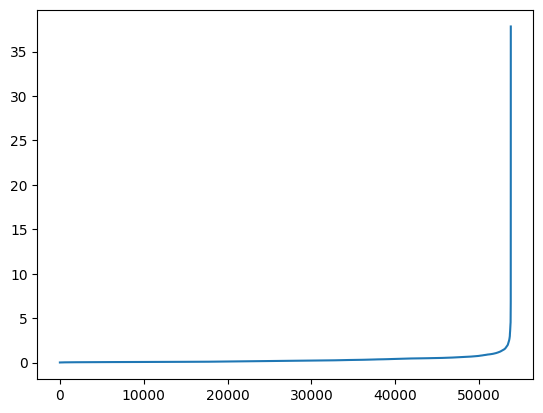

In [52]:
X = df_ohe_std
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [53]:
from sklearn.cluster import DBSCAN
# eps = 0.5 , 1 , 2 #min_samples = 10, 50, 100
dbs = DBSCAN(eps = 2, min_samples= 10)
y_pred = dbs.fit_predict(X)
import numpy as np
print(f'Number of clusters: {len(set(y_pred[np.where(y_pred != -1)]))}')
print(f"no of outliers: {len(y_pred[np.where(y_pred==-1)])}")
print("Outlier percentage:",len(y_pred[np.where(y_pred == -1)]) / y_pred.shape[0] * 100)

Number of clusters: 238
no of outliers: 1400
Outlier percentage: 2.602520727218649


# Stestical method of outlier detection

# z score (Standard scalar)

### After standard scaler our assumption is 99% is between -3 to +3

- so values less than -3 and greater than +3 are considered as outlier

- We are going to impute the outliers
- when value < -3 then replace with -3
- when value greater than +3 then replace with +3

Write python code  to perform impute operation on every column one by one

In [54]:
def impute_outlier_std(df,col):
    df.loc[df[col]>3, col] =3
    df.loc[df[col]<-3, col] =-3
    return df

df_ohe_std=(df_ohe-df_ohe.mean())/df_ohe.std()
df_impute = df_ohe_std.copy()
for col in df_impute.columns:
    df_impute = impute_outlier_std(df_impute,col)

print(df_impute)

          carat     depth     table     price         x         y         z  cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good   color_D   color_E   color_F   color_G   color_H   color_I   color_J  clarity_I1  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2
0     -1.199391 -0.173493 -1.100475 -0.904454 -1.589384 -1.537539 -1.572560 -0.174971 -0.316247   1.226139    -0.585917      -0.537816 -0.378948  2.121927 -0.463703 -0.514572 -0.426276 -0.334280 -0.234412   -0.118101   -0.185204    -0.565423     2.208854    -0.422738     -0.54241     -0.269675     -0.322081
1     -1.241640 -1.362380  1.585676 -0.904454 -1.642922 -1.660216 -1.742764 -0.174971 -0.316247  -0.815553     1.706694      -0.537816 -0.378948  2.121927 -0.463703 -0.514572 -0.426276 -0.334280 -0.234412   -0.118101   -0.185204     1.768553    -0.452715    -0.422738     -0.54241     -0.269675     -0.322081
2     -1.199391 -3.000000  3.000000 -0.904203 -1.500154 -1.458675 -1.7427

# IQR


In [55]:
def impute_outlier_iqr(df,col):
    q1,q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1
    min_val_value = q1 - 1.5 * iqr
    max_val_value = q3 + 1.5 * iqr

    df.loc[df[col]>max_val_value, col] =max_val_value
    df.loc[df[col]<min_val_value, col] =min_val_value
    return df

df_imput_iqr=df_ohe_std.copy()
for col in df_imput_iqr.columns:
    df_imput_iqr=impute_outlier_iqr(df_imput_iqr,col)

df_imput_iqr.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,5.379400e+04,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,5.379400e+04,5.379400e+04,5.379400e+04,53794.000000,53794.000000
mean,-0.011216,0.000023,-0.008281,-0.050177,0.000082,-0.001100,-0.000369,-1.749709e-01,-3.162475e-01,-9.721520e-17,8.559164e-17,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
std,0.964730,0.887918,0.967457,0.861738,0.998522,0.973594,0.981272,5.551167e-17,5.551167e-17,1.000000e+00,1.000000e+00,1.110233e-16,0.000000,3.330700e-16,0.000000,1.110233e-16,1.110233e-16,1.110233e-16,1.110233e-16,4.163375e-17,2.775583e-17,0.000000,1.665350e-16,5.551167e-17,2.220467e-16,0.000000,0.000000
min,-1.262764,-2.096692,-2.667397,-0.904454,-3.360607,-3.281303,-3.274597,-1.749709e-01,-3.162475e-01,-8.155533e-01,-5.859171e-01,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
25%,-0.840279,-0.523166,-0.652783,-0.747738,-0.911233,-0.889104,-0.891745,-1.749709e-01,-3.162475e-01,-8.155533e-01,-5.859171e-01,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
50%,-0.206553,0.036310,-0.205092,-0.384158,-0.027853,-0.021603,-0.012359,-1.749709e-01,-3.162475e-01,-8.155533e-01,-5.859171e-01,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
75%,0.511671,0.525852,0.690292,0.349460,0.721682,0.705696,0.696823,-1.749709e-01,-3.162475e-01,1.226139e+00,1.706694e+00,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
max,2.539596,2.099378,2.704906,1.995256,3.171056,3.097895,3.079675,-1.749709e-01,-3.162475e-01,1.226139e+00,1.706694e+00,-5.378156e-01,-0.378948,-4.712609e-01,-0.463703,-5.145716e-01,-4.262757e-01,-3.342795e-01,-2.344115e-01,-1.181008e-01,-1.852038e-01,-0.565423,-4.527151e-01,-4.227380e-01,-5.424098e-01,-0.269675,-0.322081
